In [30]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([50,120,180,250,320,300]).reshape(-1,1)

y=np.array([500,1000,1500,1800,2500,2500])

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_reg=DecisionTreeRegressor(max_depth=3,random_state=42)
dt_reg.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


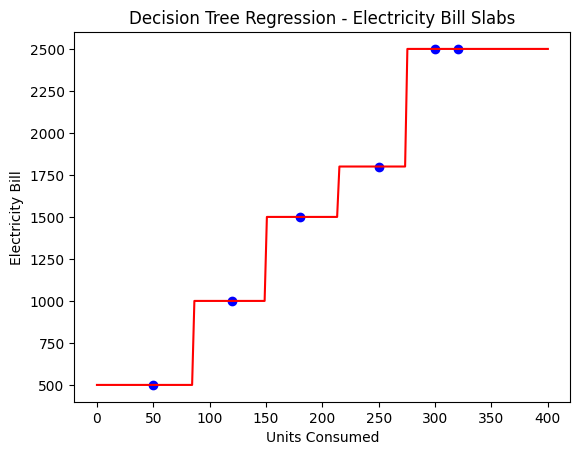

In [32]:
X_grid=np.linspace(0,400,200).reshape(-1,1)
y_pred=dt_reg.predict(X_grid)

plt.scatter(X,y,color='blue')
plt.plot(X_grid,y_pred,color='red')
plt.xlabel("Units Consumed")
plt.ylabel("Electricity Bill")
plt.title("Decision Tree Regression - Electricity Bill Slabs")
plt.show()

In [33]:
units=float(input("Enter electricity units consumed: "))
bill=dt_reg.predict([[units]])

print(f"Predicted Electricity Bill: Rs.{bill[0]:.0f}")


Predicted Electricity Bill: Rs.500


Ex2

In [34]:
X=np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y=np.array([3,3.5,4,4.2,6,6.5,7,7.2,8])

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
dt_reg=DecisionTreeRegressor(max_depth=3,random_state=42)
dt_reg.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [36]:
exp=int(input("Enter the years of experience:"))
dt_reg.predict([[exp]])

array([6.])

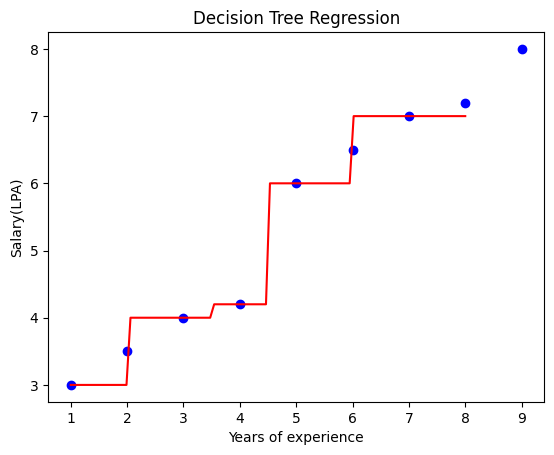

In [37]:
X_grid=np.linspace(1,8,100).reshape(-1,1)
y_pred=dt_reg.predict(X_grid)

plt.scatter(X,y,color='blue')
plt.plot(X_grid,y_pred,color='red')
plt.title("Decision Tree Regression")
plt.xlabel("Years of experience")
plt.ylabel("Salary(LPA)")
plt.show()

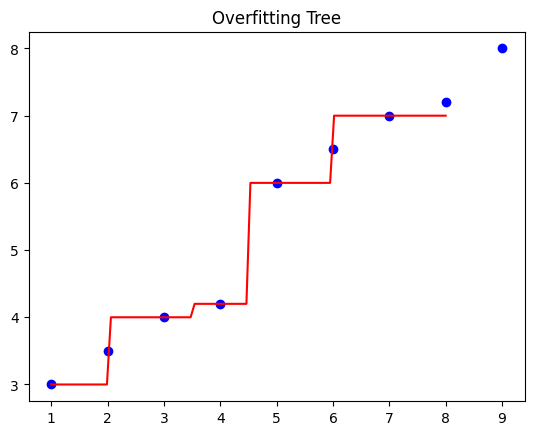

In [38]:
dt_deep=DecisionTreeRegressor(max_depth=None)
dt_deep.fit(X_train,y_train)

y_pred_deep=dt_deep.predict(X_grid)
plt.scatter(X,y,color='blue')
plt.plot(X_grid,y_pred_deep,color='red')
plt.title("Overfitting Tree")
plt.show()

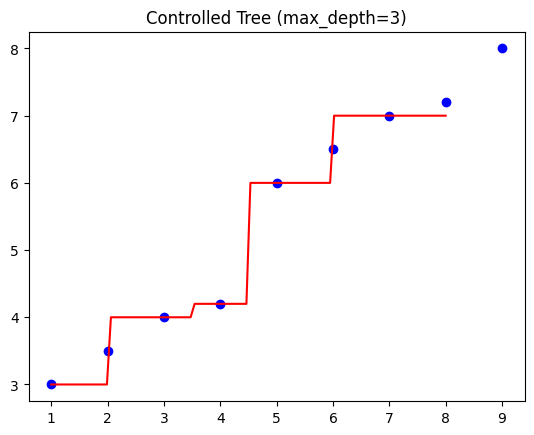

In [39]:
dt_controlled=DecisionTreeRegressor(max_depth=3)
dt_controlled.fit(X_train,y_train)

y_pred=dt_controlled.predict(X_grid)
plt.scatter(X,y,color='blue')
plt.plot(X_grid,y_pred,color='red')
plt.title("Controlled Tree (max_depth=3)")
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

y_test_pred_deep=dt_deep.predict(X_test)
y_test_pred_controlled=dt_controlled.predict(X_test)

print("Deep Tree Metrics")
print("MSE:",mean_squared_error(y_test,y_test_pred_deep))
print("R2:",r2_score(y_test,y_test_pred_deep))

print("Controlled Tree Metrics:")
print("MSE:",mean_squared_error(y_test,y_test_pred_controlled))
print("R2:",r2_score(y_test,y_test_pred_controlled))

Deep Tree Metrics
MSE: 0.18000000000000002
R2: 0.9301121656600517
Controlled Tree Metrics:
MSE: 0.18000000000000002
R2: 0.9301121656600517


Decision Tree vs Random Forest

In [49]:
np.random.seed(42)
X=np.arange(1,21).reshape(-1,1)
y=np.array([10,12,15,18,20,25,30,28,35,40,45,42,50,55,60,58,65,70,72,75])


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
dt_reg=DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


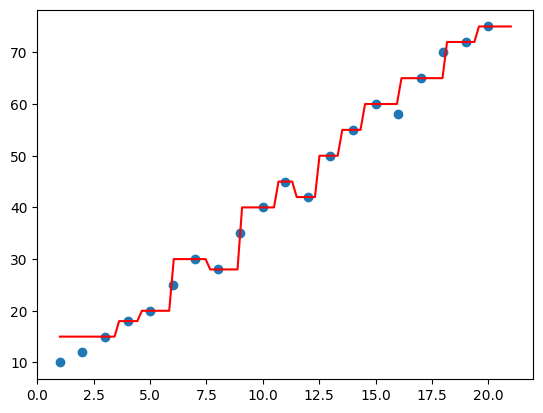

In [52]:
X_grid_dt=np.linspace(1,21,100).reshape(-1,1)
y_pred_dt=dt_reg.predict(X_grid)

plt.scatter(X,y)
plt.plot(X_grid_dt,y_pred_dt,color='red')

In [53]:
y_pred=dt_reg.predict(X_test)

print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test))
print("R2:",r2_score(y_pred,y_test))


MSE: 22.833333333333332
R2: 0.9471212608555806


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(
    random_state=42,
    n_estimators=100
)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18076\183537445.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


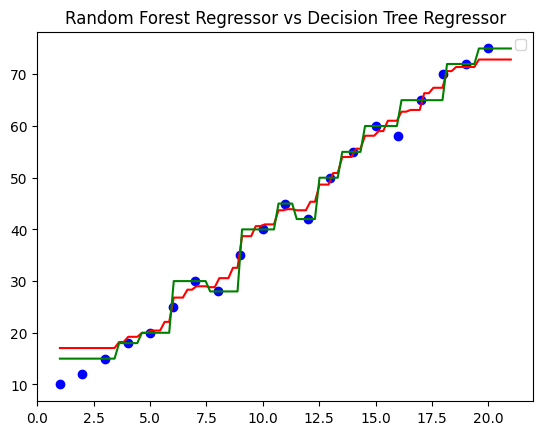

In [58]:
y_pred_rf=rf.predict(X_grid)
plt.scatter(X,y,color='blue')
plt.plot(X_grid,y_pred_rf,color='red')
plt.plot(X_grid_dt,y_pred_dt,color='green')
plt.title("Random Forest Regressor vs Decision Tree Regressor")
plt.legend()
plt.show()

In [60]:
y_pred_rf=rf.predict(X_test)
print("MSE:",mean_squared_error(y_pred_rf,y_test))
print("R2:",r2_score(y_pred_rf,y_test))

MSE: 17.557066666666667
R2: 0.9584386218633593
